In [1]:
#pip install mlxtend

In [18]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
book=pd.read_csv("book.csv")

In [21]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [22]:
book.shape

(2000, 11)

In [23]:
# lets find how many books are present in the dataset
for i in book.columns:
    print(i,end='\t')
    print(book[i].value_counts(),end='\t')
    print()


ChildBks	0    1154
1     846
Name: ChildBks, dtype: int64	
YouthBks	0    1505
1     495
Name: YouthBks, dtype: int64	
CookBks	0    1138
1     862
Name: CookBks, dtype: int64	
DoItYBks	0    1436
1     564
Name: DoItYBks, dtype: int64	
RefBks	0    1571
1     429
Name: RefBks, dtype: int64	
ArtBks	0    1518
1     482
Name: ArtBks, dtype: int64	
GeogBks	0    1448
1     552
Name: GeogBks, dtype: int64	
ItalCook	0    1773
1     227
Name: ItalCook, dtype: int64	
ItalAtlas	0    1926
1      74
Name: ItalAtlas, dtype: int64	
ItalArt	0    1903
1      97
Name: ItalArt, dtype: int64	
Florence	0    1783
1     217
Name: Florence, dtype: int64	


In [24]:
#since the data is in transcation format no need of using Transcation encoder
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [25]:
rules_s=association_rules(frequent_itemsets,metric='support',min_threshold=.1)
rules_s

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [26]:
rules_s.sort_values('support',ascending=True)[0:20] # lets consider 20 values of support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
16,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
85,(CookBks),"(ArtBks, DoItYBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
87,(DoItYBks),"(CookBks, ArtBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
79,(ChildBks),"(ArtBks, GeogBks)",0.4230,0.1275,0.1020,0.241135,1.891253,0.048067,1.149743
78,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000


In [27]:
rules_s[rules_s.support>0.1]  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [28]:
rules_s[rules_s.support>0.2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [29]:
rules_s[rules_s.support>.25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


NOW LETS CHECK FOR CONFIDENCE PARAMETER

In [30]:
rules_c=association_rules(frequent_itemsets,metric='confidence',min_threshold=.1) # the min_threshold starts from 0.35 onwards
rules_c.value_counts()

antecedents         consequents        antecedent support  consequent support  support  confidence  lift      leverage  conviction
(YouthBks)          (ChildBks)         0.2475              0.4230              0.1650   0.666667    1.576044  0.060308  1.731000      1
(GeogBks)           (CookBks, ArtBks)  0.2760              0.1670              0.1035   0.375000    2.245509  0.057408  1.332800      1
(ArtBks)            (YouthBks)         0.2410              0.2475              0.1010   0.419087    1.693281  0.041353  1.295375      1
                    (ChildBks)         0.2410              0.4230              0.1625   0.674274    1.594028  0.060557  1.771427      1
(GeogBks)           (CookBks)          0.2760              0.4310              0.1925   0.697464    1.618245  0.073544  1.880766      1
                                                                                                                                     ..
(CookBks)           (RefBks)           0.4310        

In [31]:
rules_c[rules_c.confidence>.25]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [32]:
rules_c[rules_c.confidence>0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
3,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
5,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
9,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
11,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
12,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
21,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
23,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
25,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [36]:
X_s=rules_s.support
X_s

0     0.1650
1     0.1650
2     0.2560
3     0.2560
4     0.1840
       ...  
95    0.1035
96    0.1035
97    0.1035
98    0.1035
99    0.1035
Name: support, Length: 100, dtype: float64

In [35]:
Y_s=rules_s.confidence
Y_s

0     0.666667
1     0.390071
2     0.593968
3     0.605201
4     0.434988
        ...   
95    0.537662
96    0.811765
97    0.240139
98    0.429461
99    0.375000
Name: confidence, Length: 100, dtype: float64

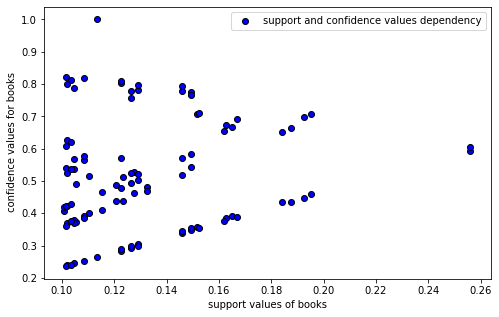

In [37]:
X_s=rules_s.support    # support as priority
Y_s=rules_s.confidence
plt.figure(figsize=(8,5))
plt.xlabel("support values of books")
plt.ylabel(" confidence values for books")
plt.scatter(X_s,Y_s,color="blue",label="support and confidence values dependency",edgecolor="black")
plt.legend(loc="best")
plt.show()

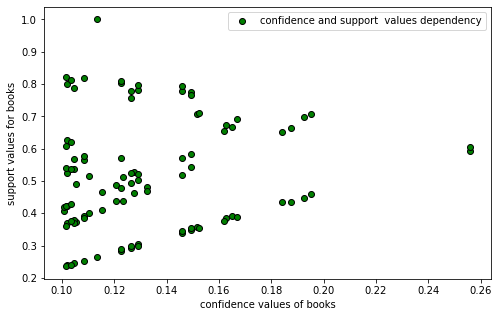

In [38]:
X_c=rules_c.support    # support as priority
Y_c=rules_c.confidence
plt.figure(figsize=(8,5))
plt.xlabel("confidence values of books")
plt.ylabel("support values for books")
plt.scatter(X_c,Y_c,color="green",label="confidence and support  values dependency",edgecolor="black")
plt.legend(loc="best")
plt.show()

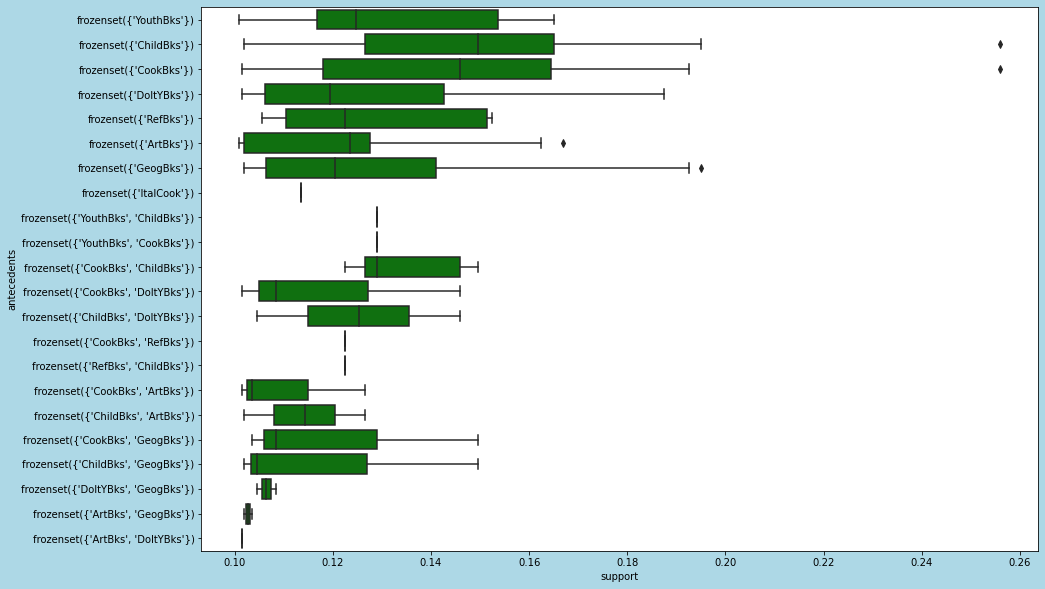

In [42]:
plt.figure(figsize=(15,10),facecolor='lightBlue',edgecolor='Red')
#plt.subplot(211)
sns.boxplot(x=rules_s.support,y=rules_s.antecedents,color="green")
plt.show()
#plt.figure(figsize=(15,10),facecolor="green",edgecolor='black')
#plt.subplot(211)
#sns.boxplot(x=rules.support,y=rules.antecedents,data=rules)
#plt.subplot(212)

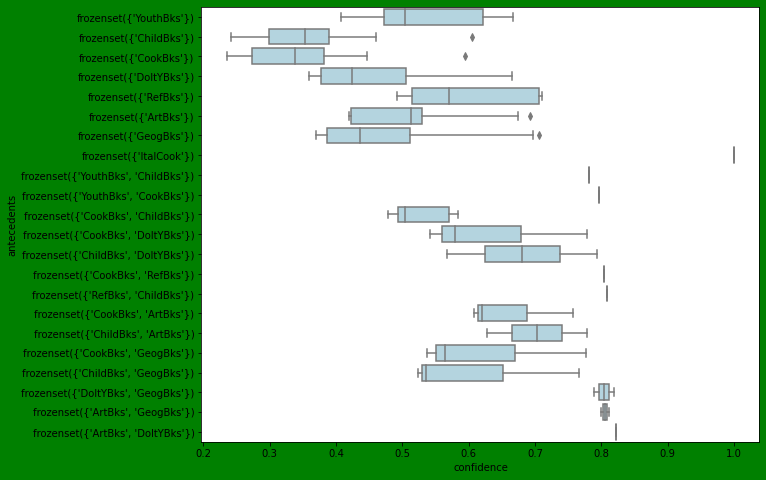

In [43]:
plt.figure(figsize=(10,8),facecolor='green',edgecolor='Blue')
sns.boxplot(x=rules_c.confidence,y=rules_c.antecedents,color="Lightblue")
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


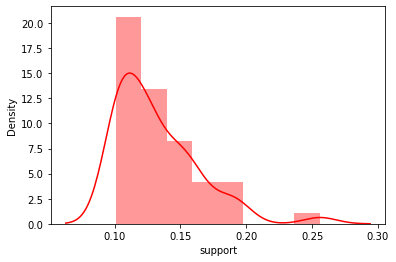

In [44]:
sns.distplot(rules_s.support,color='red')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


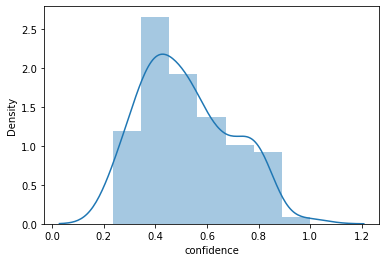

In [45]:
sns.distplot(rules_c.confidence)
plt.show()

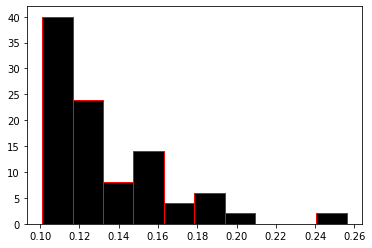

In [46]:
plt.hist(x=rules_s.support,color="black",edgecolor="red")
plt.show()

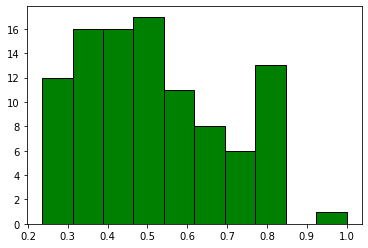

In [47]:
plt.hist(rules_c.confidence,color='green',edgecolor='black')
plt.show()

<AxesSubplot:xlabel='antecedents', ylabel='confidence'>

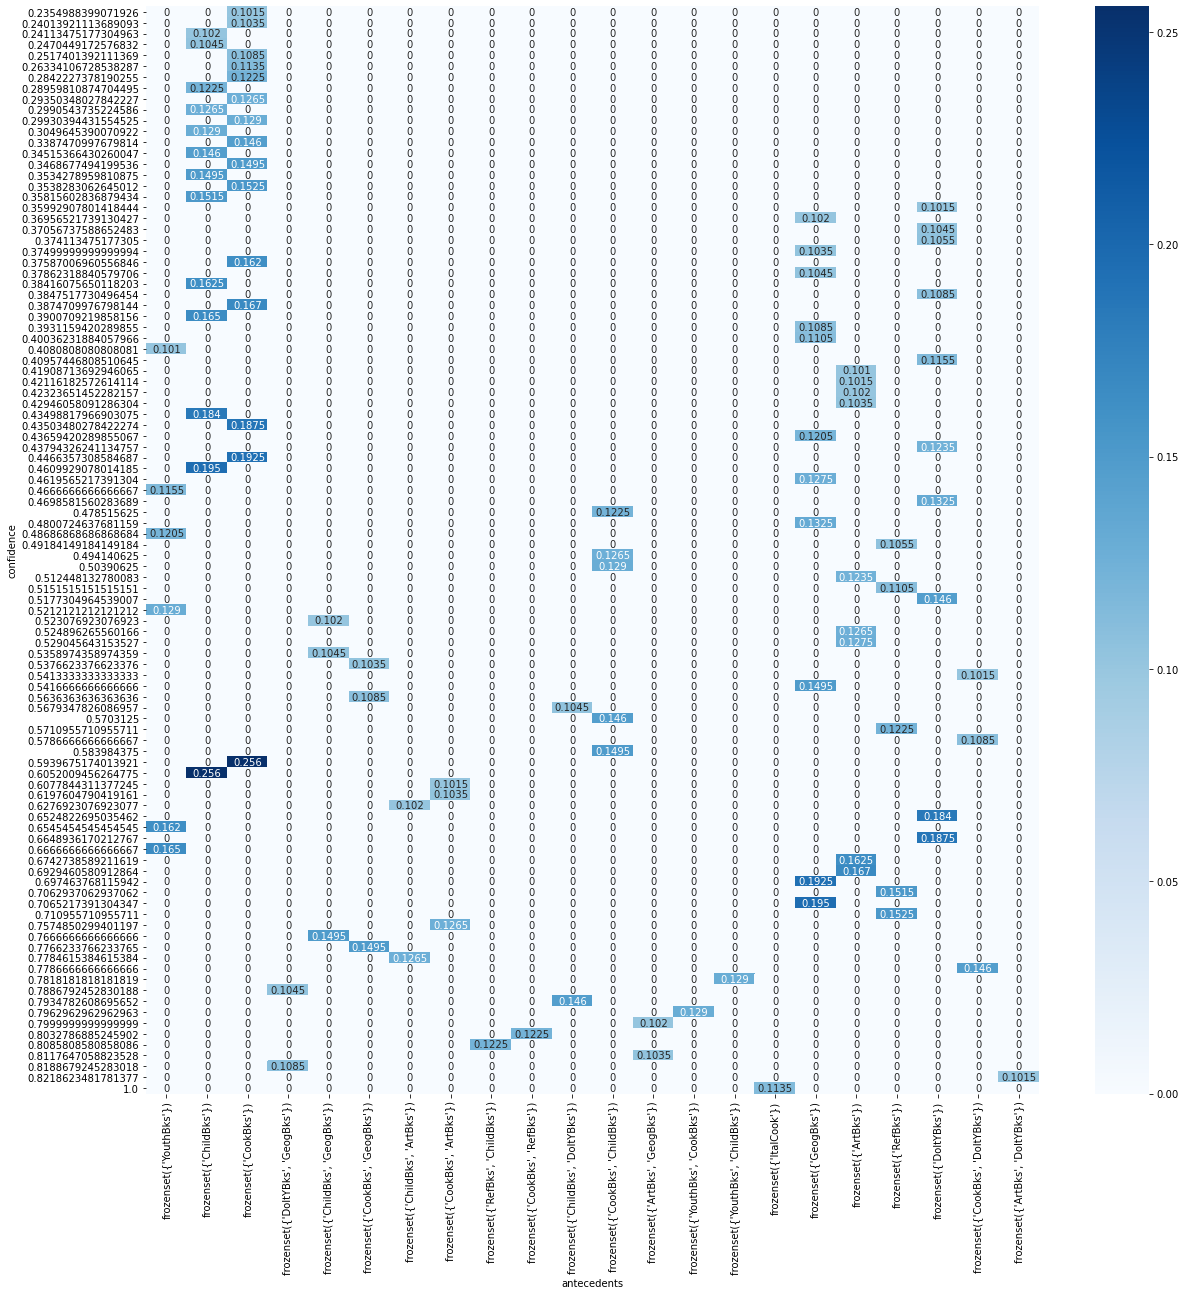

In [48]:
plt.figure(figsize=(20,20))
heatmap_support = pd.pivot_table(data=rules_s,values="support",index="confidence",columns="antecedents",aggfunc="sum",fill_value=0,)
sns.heatmap(heatmap_support,annot=True,cmap="Blues",fmt="g")

<AxesSubplot:xlabel='support', ylabel='antecedents'>

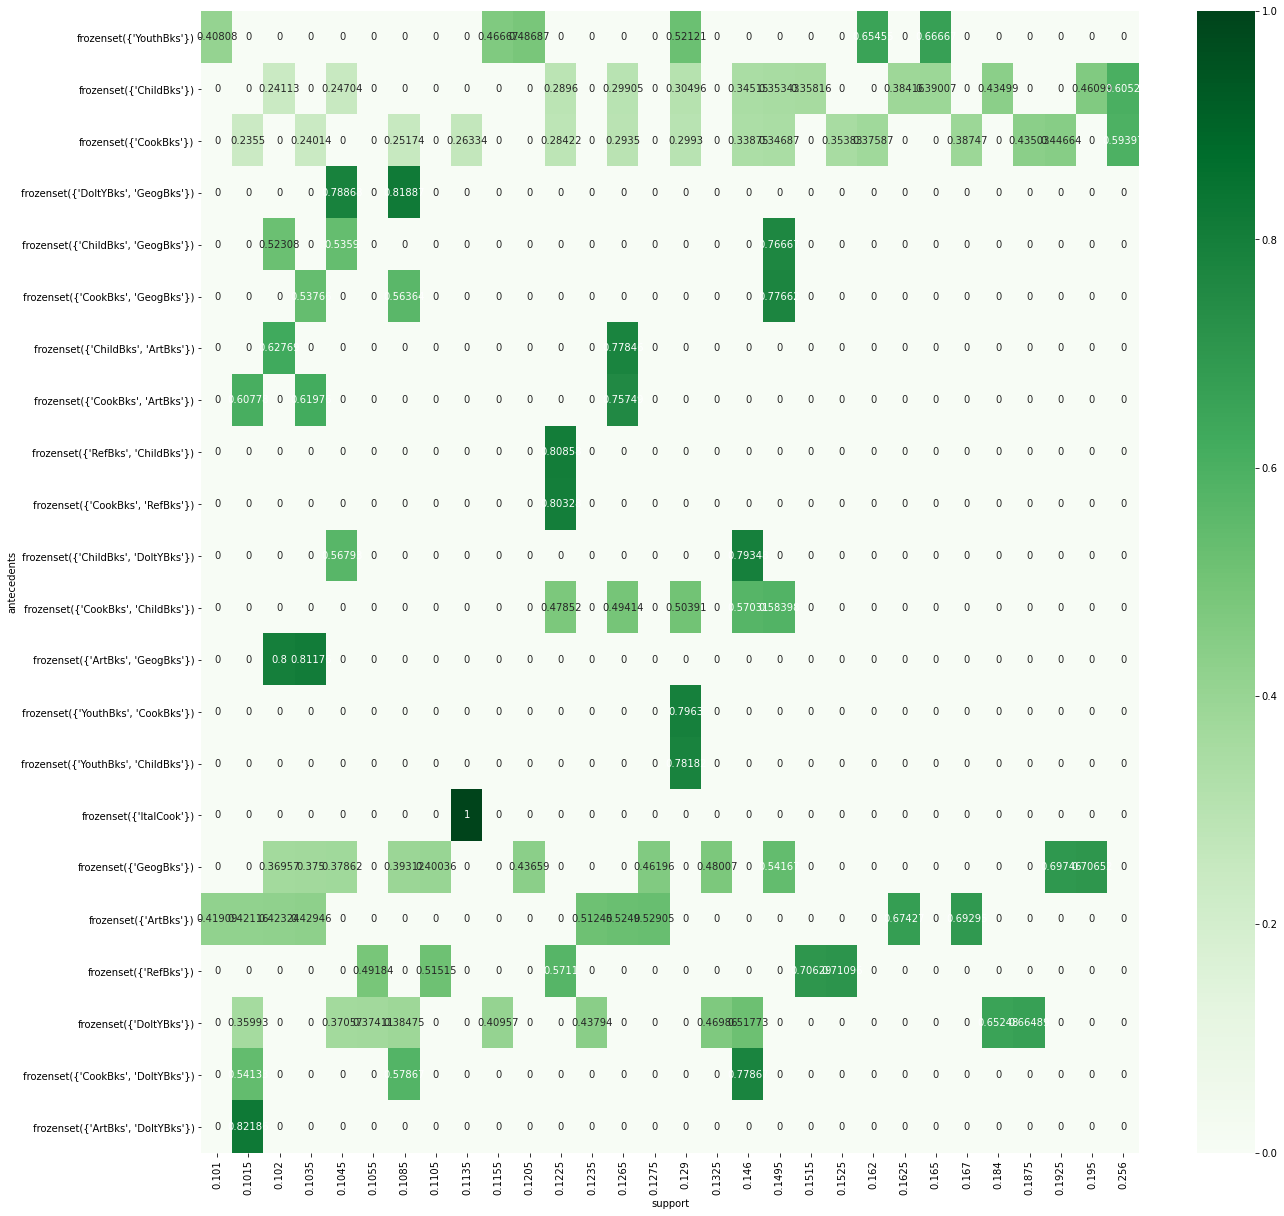

In [49]:
plt.figure(figsize=(21,21))
heatmap_confidence=pd.pivot_table(data=rules_c,values="confidence",index="antecedents",columns="support",aggfunc="sum",fill_value=0)
sns.heatmap(heatmap_confidence,annot=True,cmap="Greens",fmt=".5g",linecolor="Red")